# Describtion
 Do you trust all the news you hear from social media? All news are not real, right? So how will you detect the fake news? The answer is ML. By practicing this advanced ML project of detecting fake news, you will easily make a difference between real and fake news. Before moving ahead in this advanced ML project, get aware of the terms related to it like fake news, tfidfvectorizer, PassiveAggressive Classifier, Naive Bayes, Logistic Regrssion and SVC.

# Columns :
Title: The title of the article
Text: The text of the article
Subject: The subject of the article
Date: The date at which the article was posted

# Problem Statemtent
We will use these news record to detect if news is fake or real.

# Constraints:
The cost of a mis-classification can be high, it can cause chaos.
No Latency Requirement

# Benefits:
Can bring net neutrality.


Can stop potential fraud news.


## Importing Liabraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from prettytable import PrettyTable


## Loading dataset

In [3]:
fake_test = pd.read_csv('Fake.csv')    #reading fake csv
fake_test['label'] = 0 #Adding label: 0  to fake news
fake_test = fake_test[['text', 'label']]

In [4]:
true_test = pd.read_csv('True.csv')     #reading True.csv
true_test['label'] = 1 #Adding label: 1  to real news
true_test = true_test[['text', 'label']]

In [5]:
data = pd.concat([true_test, fake_test])       
data = data.sample(frac = 1)              # combining Fake and True in data

In [6]:
data # Final Dataset

,text,label
2306,WASHINGTON (Reuters) - When President Donald T...,1
2105,(Reuters) - Billionaire investor Carl Icahn en...,1
3712,Trump s threatening of the press seems to be p...,0
6015,Black and brown people accounted for 86.5 perc...,0
10323,WASHINGTON (Reuters) - U.S. Democratic preside...,1
10576,"Last week, Alex Jones scooped NBC and Megyn Ke...",0
4606,Donald Trump gets a lot of attention for his o...,0
13318,"POTSDAM, Germany (Reuters) - German police on ...",1
12421,This isn t the first time outspoken conservati...,0
2156,It s time for the IRS to end non-profit status...,0


## Performing simple EDA

In [ ]:
data.columns #Checking columns

In [ ]:
data.isnull().sum() #Checking for null values

In [ ]:
data.isna().sum() #Checking for Nan values

# Text Preproccesing

In [7]:
from nltk.stem.porter import PorterStemmer
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup

In [8]:
# DECONTRACTING 
# eg:  can't = can not
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


In [9]:
# Defing Stopword Explictly
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [10]:
#Preprocessing the text

from tqdm import tqdm     #for process bar
preprocessed_text = []
# tqdm is for printing the status bar
for sentance in tqdm(data['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_text.append(sentance.strip())


100%|██████████| 44898/44898 [00:55<00:00, 810.00it/s]


In [ ]:
#Appending processed text into DATA

data['text'] = preprocessed_text


In [ ]:
data

In [ ]:
from wordcloud import WordCloud                  #Wordcloud for popularword
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(1, figsize=[9, 9])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=600).generate(" ".join(data['text']))
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('Frequent Words',fontsize=6);

In [ ]:
import seaborn as sns
sns.distplot(data['label']);


#  Label follows a gaussian distribution with fake being left skweked and truth being rightly skweked

In [ ]:
sns.distplot(data['label'], kde=False, rug=True,bins=3); #SNS DISPLOT

## Label is slightly unbalanced so will creating model this has to be taken care of as dataset is small and this can create baising

#### To solve this problem we will focus on Text and Label columns

In [ ]:
X = data.text               #Spliting data
y = data.label
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.30, random_state = 100)
X_cv, X_test, y_cv, y_test = train_test_split(X_train, y_train, train_size = 0.30, random_state = 100)

# Using TF-IDF to convert text into vectors

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7) # Creating tfidf object
tfidf_train = tfidf_vectorizer.fit_transform(X_train) #Converting Text to tfidf vectors
tfidf_cv = tfidf_vectorizer.transform(X_cv)
tfidf_test = tfidf_vectorizer.transform(X_test)

#                                           Creating Models

## 1. PassiveAggressiveClassifier

## Training

In [ ]:
pac = PassiveAggressiveClassifier(max_iter = 50)            #Passive Classifier
pac.fit(tfidf_train, y_train)
cv_pred = pac.predict(tfidf_cv)
pac_score_cv = accuracy_score(y_cv, cv_pred)*100
print('Accuracy:', pac_score_cv)
cm= confusion_matrix(y_cv, cv_pred)

sns.heatmap(cm,annot=True)

## Testing

In [ ]:
test_pred = pac.predict(tfidf_test)                        #Testing of Passive Classifier of Test data
pac_score_test = accuracy_score(y_test, test_pred)*100
print('~~~~~~~Accuracy on Test data~~~~~~~~~~~:', pac_score_test)
cm1= confusion_matrix(y_test, test_pred)

sns.heatmap(cm1,annot=True)

## 2. Logistic Reggression

#### Training

In [ ]:
lr = LogisticRegression()                       #Logistic Regression training
lr.fit(tfidf_train, y_train)
cv_pred = lr.predict(tfidf_cv)
lr_score_cv = accuracy_score(y_cv, cv_pred)*100
print('Accuracy:',lr_score_cv)
print(confusion_matrix(y_cv, cv_pred))

#### Testing

In [ ]:
test_pred = lr.predict(tfidf_test)                       #testing logistic regression on test data
lr_score_test = accuracy_score(y_test, test_pred)*100
print('Accuracy on test data: ',lr_score_test)
cm2= confusion_matrix(y_test, test_pred)
sns.heatmap(cm2,annot=True)

## 3. SVC

#### Training

In [ ]:
svc = SVC()
svc.fit(tfidf_train, y_train)            #training support vector classifier
cv_pred = svc.predict(tfidf_cv)
svc_score_cv = accuracy_score(y_cv, cv_pred)*100
print('Accuracy: ', svc_score_cv)
print(confusion_matrix(y_cv, cv_pred))

#### Testing

In [ ]:
test_pred = svc.predict(tfidf_test)                #testing svc on test data
svc_score_test = accuracy_score(y_test, test_pred)*100
print('Accuracy: ',svc_score_test)
cm3=confusion_matrix(y_test, test_pred)
sns.heatmap(cm3,annot=True)

## 4. Naive Bayes

## Training 

In [ ]:
nb = GaussianNB()                              #training Naive bayes 
nb.fit(tfidf_train.toarray(), y_train)
cv_pred = nb.predict(tfidf_cv.toarray())
nb_score_cv = accuracy_score(y_cv, cv_pred)*100
print('Accuracy: ',nb_score_cv)
print(confusion_matrix(y_cv, cv_pred))

## Testing

In [ ]:
test_pred = nb.predict(tfidf_test.toarray())           #testing NB on test data 
nb_score_test = accuracy_score(y_test, test_pred)*100
print('Accuracy:', nb_score_test)
cm4=confusion_matrix(y_test, test_pred)
sns.heatmap(cm4,annot=True)

## Summary of all trained and tested models

In [ ]:
x = PrettyTable()                        #making table
x.field_names = ['Model Name', 'CV_Accuracy', 'Testing_Accuracy']
x.add_row(['PassiveAggressiveClassifier', pac_score_cv , pac_score_test])
x.add_row([" -------------------------"," ----------- "," ----------- "])
x.add_row(['Logistic Regression', lr_score_cv , lr_score_test])
x.add_row([" -------------------------"," ----------- "," ----------- "])
x.add_row(['Support Vector Classifier', svc_score_cv , svc_score_test])
x.add_row([" -------------------------"," ----------- "," ----------- "])
x.add_row(['Naive Bayes', nb_score_cv , nb_score_test])
print(x)

# Conclusion :  Passive Aggressive Classiffier having train and test best accuracy as well as Confusion matrix shows it classsify correctly

#  TEST MODEL

In [ ]:
text='WASHINGTON (Reuters) - A U.S. appeals court on' #random statement

In [ ]:
def preprocess(x):                            #preproccesing nlp function
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")    #replace 1000 to 1k                       .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)       #1000000 to 1M
    x = re.sub(r"([0-9]+)000", r"\1k", x)      
    x = re.sub(r"http\S+", "", x)               #removing https
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x


In [ ]:
text =  preprocess(text)


In [ ]:
text

In [ ]:
text_vect = tfidf_vectorizer.transform(([text]))       #transforming test text using TFIDF 


In [ ]:
pred = pac.predict(text_vect)


In [ ]:
pred

## LSTM

In [35]:
import numpy as np

import pandas as pd

from keras.models import Sequential

from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

from keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences

from keras.utils.np_utils import to_categorical

import re

#importing library

In [28]:
from collections import Counter
# Count unique words
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

#counting unique

In [29]:
text = data.text
counter = counter_word(text)   #processing text into counterword
num_words = len(counter)
max_length = 300

In [42]:
#Using tokenizer to make vector and padd them with 0 using padsequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(text)          #fiting on text
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(text)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)     #padding the text



In [47]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))                       #using sigmoid function
model.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           4416704   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 4,433,355
Trainable params: 4,433,355
Non-trainable params: 0
_________________________________________________________________
None


In [56]:

earlystop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False                                #using earlystopping 
)

history = model.fit(padded_sequence,data.label,
                  validation_split=0.2, epochs=5,
                   batch_size=8, 
                    callbacks=[earlystop]
                   )

Epoch 1/5
4490/4490 [==============================] - 1615s 360ms/step - loss: 0.1005 - accuracy: 0.9668 - val_loss: 0.0712 - val_accuracy: 0.9767
Epoch 2/5
4490/4490 [==============================] - 1529s 340ms/step - loss: 0.0852 - accuracy: 0.9718 - val_loss: 0.0624 - val_accuracy: 0.9798
Epoch 3/5
4490/4490 [==============================] - 1523s 339ms/step - loss: 0.0517 - accuracy: 0.9841 - val_loss: 0.0865 - val_accuracy: 0.9682


In [58]:
import matplotlib.pyplot as plt              #function for printing accuracy and loss graph

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()




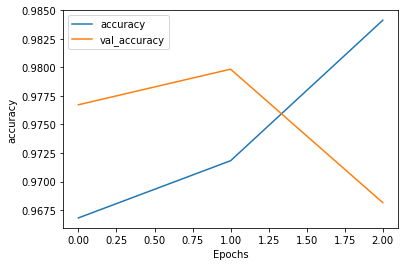

In [59]:
plot_graphs(history, 'accuracy')      #accuracy



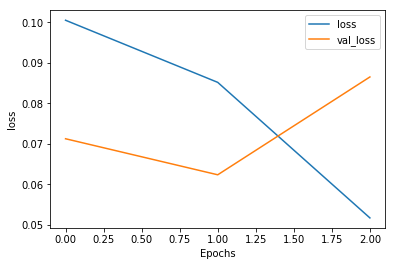

In [60]:
plot_graphs(history, 'loss')
                                 #loss